In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

X_train, X_test, Y_train, Y_test = np.load(
    './model/gender_data_max_8_size_25827.npy',
    allow_pickle=True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

C:\Users\kim\.conda\envs\exam_cv2\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kim\.conda\envs\exam_cv2\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\kim\.conda\envs\exam_cv2\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\kim\.conda\envs\exam_cv2\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


(47923, 8)
(11981, 8)
(47923, 3)
(11981, 3)


In [2]:
model = Sequential()
model.add(Embedding(25827, 500, input_length=8))
model.add(Conv1D(32, kernel_size=5,
            padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=1))
model.add(LSTM(64, activation='tanh',
               return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

print(model.summary())
#val_acc = 0.79 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 500)            12913500  
_________________________________________________________________
conv1d (Conv1D)              (None, 8, 32)             80032     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 8, 64)             24832     
_________________________________________________________________
dropout (Dropout)            (None, 8, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [8]:
model = Sequential()
model.add(Embedding(25827, 500, input_length=8))
model.add(Conv1D(32, kernel_size=5,
            padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=1))
model.add(LSTM(128, activation='tanh',
               return_sequences=True))
model.add(Dropout(0.3)) #너무 높이면 또 정확도 떨어짐
model.add(LSTM(64, activation='tanh',
               return_sequences=True))
model.add(Dropout(0.3)) #dropout 낮췄을 때 정확도 떨어짐
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

print(model.summary())
#val_acc = 0.78

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 8, 500)            12913500  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 8, 32)             80032     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 8, 128)            82432     
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 128)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 8, 64)             49408     
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 64)            

In [30]:
model = Sequential()
model.add(Embedding(25827, 500, input_length=8))
model.add(Dropout(0.3))
model.add(Conv1D(32, kernel_size=5,
            padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=1))
model.add(LSTM(128, activation='tanh',
               return_sequences=True))
model.add(Dropout(0.3)) #dropout 낮췄을 때 정확도 떨어짐
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

print(model.summary())
#val_acc = 0.75

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 9, 500)            14831000  
_________________________________________________________________
dropout_28 (Dropout)         (None, 9, 500)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 9, 32)             80032     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 9, 32)             0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 9, 128)            82432     
_________________________________________________________________
dropout_29 (Dropout)         (None, 9, 128)            0         
_________________________________________________________________
dense_19 (Dense)             (None, 9, 64)           

In [9]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
fit_hist = model.fit(X_train, Y_train, batch_size=100,
        epochs=5, validation_data=(X_test, Y_test),
        callbacks=[early_stopping])

score = model.evaluate(X_test, Y_test)
print(score[1])

model.save('./model/gender_classfication_{}_mecab.h5'.format(score[1]))

Epoch 1/5
480/480 [==============================] - 116s 241ms/step - loss: 0.6383 - accuracy: 0.7126 - val_loss: 0.5090 - val_accuracy: 0.7948
Epoch 2/5
375/375 [==============================] - 2s 4ms/step - loss: 0.5227 - accuracy: 0.7986
0.7985977530479431


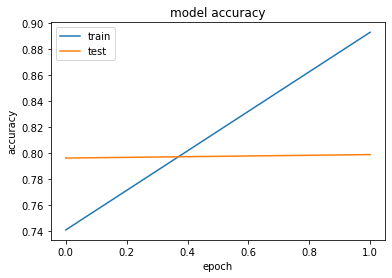

In [5]:
# summarize history for accuracy
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

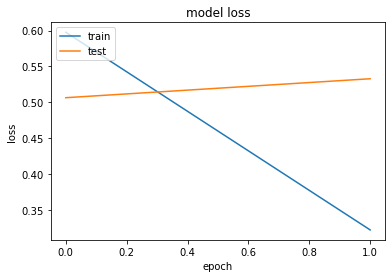

In [6]:
# summarize history for loss
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()